# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: Brazil (^BVSP)

In [1]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [2]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘quadprog’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘snakecase’, ‘PerformanceAnalytics’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘janitor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method 

**Reading the datas (Source: Yahoo Finance)**

In [3]:
getSymbols("^BVSP", from = '2000-01-01', to = '2021-05-31') 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Warning message:
“^BVSP contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^BVSP"

**Checking data frequency**

In [4]:
periodicity(BVSP)        

Daily periodicity from 2000-01-03 to 2021-05-28 

**Identifying missing values (%)**

In [5]:
round(prop.table(table(is.na(BVSP)))*100, digits = 2)       


FALSE  TRUE 
98.35  1.65 

**Removing missing values**

In [6]:
BVSP <- na.omit(BVSP)    
round(prop.table(table(is.na(BVSP)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [7]:
BVSP.df <- BVSP[,'BVSP.Close']                              
head(BVSP.df)

           BVSP.Close
2000-01-03      16930
2000-01-04      15851
2000-01-05      16245
2000-01-06      16107
2000-01-07      16309
2000-01-10      17022

**Calculating log-returns**

In [8]:
logreturn <- diff(log(BVSP.df$BVSP.Close))*100                     
head(logreturn)

           BVSP.Close
2000-01-03         NA
2000-01-04 -6.5854606
2000-01-05  2.4552579
2000-01-06 -0.8531209
2000-01-07  1.2463143
2000-01-10  4.2789522

**Aggregating the data**

In [9]:
BVSP.df$BVSP.Return <- logreturn                  
BVSP.df <- na.omit(BVSP.df)
head(BVSP.df)

           BVSP.Close BVSP.Return
2000-01-04      15851  -6.5854606
2000-01-05      16245   2.4552579
2000-01-06      16107  -0.8531209
2000-01-07      16309   1.2463143
2000-01-10      17022   4.2789522
2000-01-11      16573  -2.6731760

**Identifying missing values (%)**

In [10]:
round(prop.table(table(is.na(BVSP.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [11]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



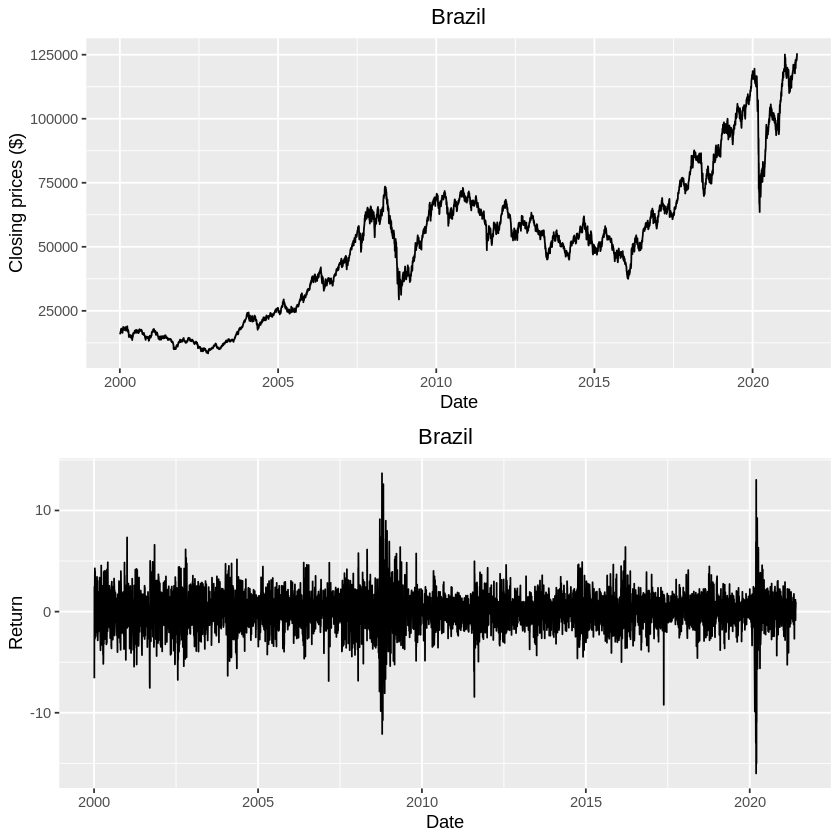

In [12]:
# Price chart
graph1 <- ggplot(BVSP.df,
                aes(x = index(BVSP.df), y = BVSP.df[,'BVSP.Close'])) +
                geom_line(color = "black") +
                ggtitle("Brazil") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(BVSP.df,
                aes(x = index(BVSP.df), y = BVSP.df[,'BVSP.Return'])) +
                geom_line(color = "black") +
                ggtitle("Brazil") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [13]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness




**Descriptive statistic**

In [14]:
# mean
round(mean(BVSP.df$BVSP.Return), 3)                         

[1] 0.038

In [15]:
# sd
round(sd(BVSP.df$BVSP.Return), 3)                           

[1] 1.81

In [16]:
# skewness
round(skewness(BVSP.df$BVSP.Return), 3)                     

BVSP.Return 
     -0.367

In [17]:
# kurtosis
round(kurtosis(BVSP.df$BVSP.Return), 3)                     

BVSP.Return 
      9.535

In [18]:
# min
round(min(BVSP.df$BVSP.Return), 3)                          

[1] -15.993

In [19]:
# p5
round(quantile(BVSP.df$BVSP.Return, probs = 0.05), 3)       

5% 
-2.821

In [20]:
# p25
round(quantile(BVSP.df$BVSP.Return, probs = 0.25), 3)       

25% 
-0.925

In [21]:
# median
round(median(BVSP.df$BVSP.Return), 3)                       

[1] 0.076

In [22]:
# p75
round(quantile(BVSP.df$BVSP.Return, probs = 0.75), 3)       

75% 
1.075

In [23]:
# p95
round(quantile(BVSP.df$BVSP.Return, probs = 0.95), 3)       

95% 
2.676

In [24]:
# max
round(max(BVSP.df$BVSP.Return), 3)                          

[1] 13.677

In [25]:
# n observations
length(BVSP.df$BVSP.Return)                                 

[1] 5292

## 4. Series normality analysis

In [26]:
# Package
library(tseries)

In [27]:
jarque.bera.test(BVSP.df$BVSP.Return)


	Jarque Bera Test

data:  BVSP.df$BVSP.Return
X-squared = 9535.5, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [28]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘TSA’


The following objects are masked from ‘package:moments’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘aTSA’


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify




**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

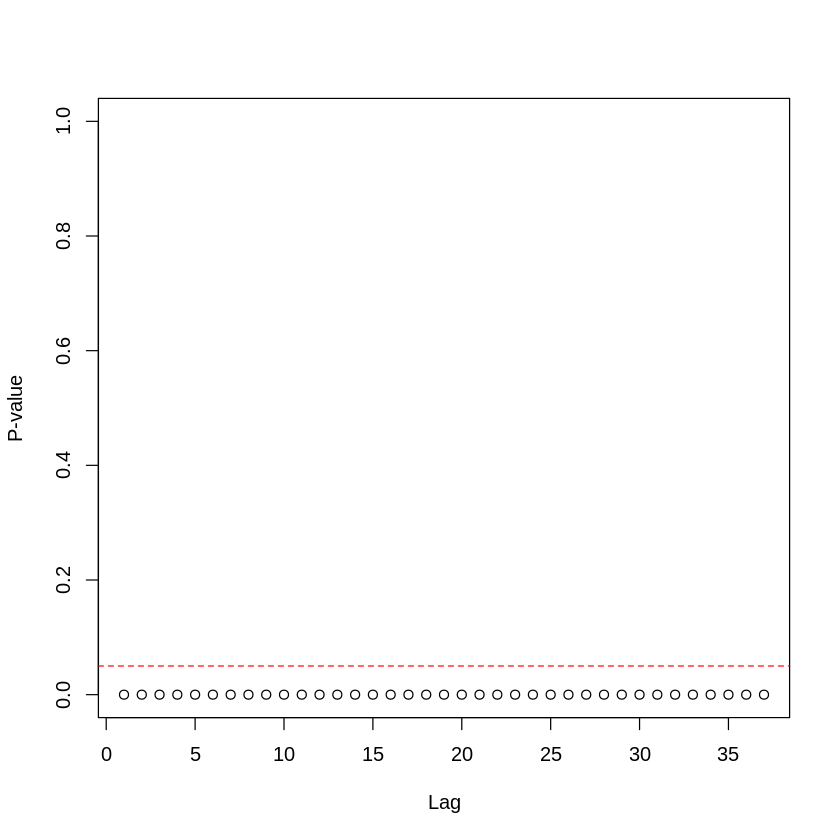

In [29]:
McLeod.Li.test(y = BVSP.df$BVSP.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [30]:
ArchTest(BVSP.df$BVSP.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  BVSP.df$BVSP.Return
Chi-squared = 1501.7, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [31]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘nloptr’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks 

In [32]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [33]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [34]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = BVSP.df$BVSP.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0624,0.0205,3.0436,0.0023
omega,0.0670,0.0117,5.7170,0.0000
alpha1,0.0741,0.0070,10.6042,0.0000
beta1,0.9028,0.0091,98.8928,0.0000
skew,0.8982,0.0162,55.3967,0.0000


In [35]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

BVSP.df$BVSP.VolGARCH <- as.numeric(var.garch)
head(BVSP.df)

[1] 3.277609 6.298761 6.177524 5.706157 5.322319 6.188572

           BVSP.Close BVSP.Return BVSP.VolGARCH
2000-01-04      15851  -6.5854606      3.277609
2000-01-05      16245   2.4552579      6.298761
2000-01-06      16107  -0.8531209      6.177524
2000-01-07      16309   1.2463143      5.706157
2000-01-10      17022   4.2789522      5.322319
2000-01-11      16573  -2.6731760      6.188572

**EGARCH model**

In [36]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [37]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = BVSP.df$BVSP.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0242,0.0207,1.1709,0.2416
omega,0.0286,0.0021,13.5036,0.0000
alpha1,-0.0789,0.0071,-11.0605,0.0000
beta1,0.9731,0.0008,1176.9484,0.0000
gamma1,0.1347,0.0109,12.3416,0.0000
skew,0.9035,0.0164,55.2486,0.0000


In [38]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

BVSP.df$BVSP.VolEGARCH <- as.numeric(var.egarch)
head(BVSP.df)

[1] 3.277192 6.399356 5.935172 5.645912 5.124717 5.032995

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192
2000-01-05      16245   2.4552579      6.298761       6.399356
2000-01-06      16107  -0.8531209      6.177524       5.935172
2000-01-07      16309   1.2463143      5.706157       5.645912
2000-01-10      17022   4.2789522      5.322319       5.124717
2000-01-11      16573  -2.6731760      6.188572       5.032995

**GJR-GARCH model**

In [39]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [40]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = BVSP.df$BVSP.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0295,0.0207,1.4267,0.1537
omega,0.0792,0.0123,6.4331,0.0000
alpha1,0.0177,0.0066,2.6719,0.0075
beta1,0.9045,0.0095,95.2271,0.0000
gamma1,0.0985,0.0125,7.8685,0.0000
skew,0.9031,0.0164,54.9798,0.0000


In [41]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

BVSP.df$BVSP.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(BVSP.df)

[1] 3.277075 8.130352 7.537728 6.987836 6.426154 6.212217

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399356         8.130352
2000-01-06      16107  -0.8531209      6.177524       5.935172         7.537728
2000-01-07      16309   1.2463143      5.706157       5.645912         6.987836
2000-01-10      17022   4.2789522      5.322319       5.124717         6.426154
2000-01-11      16573  -2.6731760      6.188572       5.032995         6.212217

## 7. Realized GARCH model estimation

In [42]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [43]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                          solver = 'hybrid',
                          realizedVol = BVSP.df$BVSP.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,-0.0030,0.0376,-0.0796,0.9366
alpha1,0.9845,0.0369,26.6950,0.0000
beta1,0.0279,0.0136,2.0545,0.0399
eta11,0.0038,0.0015,2.5566,0.0106
eta21,0.0031,0.0008,4.0804,0.0000
delta,0.9687,0.0336,28.8314,0.0000
lambda,0.1058,0.0010,102.8766,0.0000
skew,0.8949,0.0159,56.2823,0.0000
xi,0.0207,0.0374,0.5548,0.5790


In [44]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

BVSP.df$BVSP.VolRealGARCH <- as.numeric(var.realgarch)
head(BVSP.df)

[1] 3.278438 3.316347 6.311156 6.303618 5.829589 5.431456

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399356         8.130352
2000-01-06      16107  -0.8531209      6.177524       5.935172         7.537728
2000-01-07      16309   1.2463143      5.706157       5.645912         6.987836
2000-01-10      17022   4.2789522      5.322319       5.124717         6.426154
2000-01-11      16573  -2.6731760      6.188572       5.032995         6.212217
           BVSP.VolRealGARCH
2000-01-04          3.278438
2000-01-05          3.316347
2000-01-06          6.311156
2000-01-07          6.303618
2000-01-10          5.829589
2000-01-11          5.431456

**Realized EGARCH**

In [45]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                            solver = 'hybrid',
                            realizedVol = BVSP.df$BVSP.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0127,0.0352,0.3616,0.7177
alpha1,0.9788,0.0344,28.4833,0.0000
beta1,0.0201,0.0137,1.4728,0.1408
eta11,0.0036,0.0017,2.1494,0.0316
eta21,0.0051,0.0009,5.8745,0.0000
delta,0.9770,0.0313,31.1637,0.0000
lambda,0.1208,0.0012,102.8753,0.0000
skew,0.8998,0.0160,56.1440,0.0000
xi,0.0097,0.0354,0.2738,0.7842


In [46]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

BVSP.df$BVSP.VolRealEGARCH <- as.numeric(var.realegarch)
head(BVSP.df)

[1] 3.278438 3.314774 6.382820 6.007942 5.714244 5.192185

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399356         8.130352
2000-01-06      16107  -0.8531209      6.177524       5.935172         7.537728
2000-01-07      16309   1.2463143      5.706157       5.645912         6.987836
2000-01-10      17022   4.2789522      5.322319       5.124717         6.426154
2000-01-11      16573  -2.6731760      6.188572       5.032995         6.212217
           BVSP.VolRealGARCH BVSP.VolRealEGARCH
2000-01-04          3.278438           3.278438
2000-01-05          3.316347           3.314774
2000-01-06          6.311156           6.382820
2000-01-07          6.303618           6.007942
2000-01-10          5.829589           5.714244
2000-01-11          5.431456           5.192185

**Realized GJR-GARCH**

In [47]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                              solver = 'hybrid',
                              realizedVol = BVSP.df$BVSP.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0206,0.0368,0.5592,0.5760
alpha1,0.9775,0.0361,27.0844,0.0000
beta1,0.0111,0.0136,0.8127,0.4164
eta11,0.0039,0.0017,2.2714,0.0231
eta21,0.0046,0.0009,5.1193,0.0000
delta,0.9871,0.0337,29.2835,0.0000
lambda,0.1231,0.0012,102.8758,0.0000
skew,0.8990,0.0161,55.7878,0.0000
xi,0.0020,0.0374,0.0538,0.9571


In [48]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

BVSP.df$BVSP.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(BVSP.df)

[1] 3.278438 3.300079 8.022157 7.523607 6.981702 6.427329

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399356         8.130352
2000-01-06      16107  -0.8531209      6.177524       5.935172         7.537728
2000-01-07      16309   1.2463143      5.706157       5.645912         6.987836
2000-01-10      17022   4.2789522      5.322319       5.124717         6.426154
2000-01-11      16573  -2.6731760      6.188572       5.032995         6.212217
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316347           3.314774             3.300079
2000-01-06          6.311156           6.382820             8.022157
2000-01-07          6.303618           6.007942             7.523607
2000-01-10          5.829589           5.714244             6.981702
2000-01-11          5.4314

## 8. Markov-Switching GARCH estimation

In [49]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘expm’, ‘fanplot’




2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [50]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [51]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = BVSP.df$BVSP.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0351     0.0101   3.4763 2.542e-04
alpha1_1   0.0502     0.0130   3.8659 5.534e-05
beta_1     0.9298     0.0040 232.3856    <1e-16
xi_1       0.9351     0.0212  44.1838    <1e-16
alpha0_2   1.4578     0.9262   1.5740 5.775e-02
alpha1_2   0.2163     0.5751   0.3760 3.534e-01
beta_2     0.7704     0.0416  18.5286    <1e-16
xi_2       0.7102     0.1176   6.0396 7.723e-10
P_1_1      0.9776     0.2614   3.7404 9.185e-05
P_2_1      0.5015     0.0241  20.7952    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [52]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

BVSP.df$BVSP.VolMSGARCH <- as.numeric(var.msgarch)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.519228 2.781641 2.483674 2.274973 2.173013 2.625170

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399356         8.130352
2000-01-06      16107  -0.8531209      6.177524       5.935172         7.537728
2000-01-07      16309   1.2463143      5.706157       5.645912         6.987836
2000-01-10      17022   4.2789522      5.322319       5.124717         6.426154
2000-01-11      16573  -2.6731760      6.188572       5.032995         6.212217
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316347           3.314774             3.300079
2000-01-06          6.311156           6.382820             8.022157
2000-01-07          6.303618           6.007942             7.523607
2000-01-10          5.829589           5.714244             6.981702
2000-01-11          5.4314

**MS EGARCH**

In [53]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [54]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = BVSP.df$BVSP.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0102     0.0033   3.1312 8.704e-04
alpha1_1   0.0732     0.0118   6.1960 2.895e-10
alpha2_1  -0.0561     0.0078  -7.2196 2.608e-13
beta_1     0.9859     0.0033 299.0569    <1e-16
xi_1       0.9253     0.0210  44.0053    <1e-16
alpha0_2   0.1211     0.0343   3.5286 2.089e-04
alpha1_2   0.0511     0.0376   1.3584 8.716e-02
alpha2_2  -0.2282     0.0499  -4.5724 2.410e-06
beta_2     0.9506     0.0155  61.3541    <1e-16
xi_2       0.8898     0.0717  12.4103    <1e-16
P_1_1      0.9910     0.0403  24.5829    <1e-16
P_2_1      0.1132     0.0036  3

In [55]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

BVSP.df$BVSP.VolMSEGARCH <- as.numeric(var.msegarch)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.663138 2.160653 2.058091 1.965085 1.869909 2.045523

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399356         8.130352
2000-01-06      16107  -0.8531209      6.177524       5.935172         7.537728
2000-01-07      16309   1.2463143      5.706157       5.645912         6.987836
2000-01-10      17022   4.2789522      5.322319       5.124717         6.426154
2000-01-11      16573  -2.6731760      6.188572       5.032995         6.212217
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316347           3.314774             3.300079
2000-01-06          6.311156           6.382820             8.022157
2000-01-07          6.303618           6.007942             7.523607
2000-01-10          5.829589           5.714244             6.981702
2000-01-11          5.4314

**MS GJR-GARCH**

In [56]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [57]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = BVSP.df$BVSP.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0105     0.0173   0.6048 2.727e-01
alpha1_1   0.0197     0.0089   2.2173 1.330e-02
alpha2_1   0.0646     0.0286   2.2554 1.205e-02
beta_1     0.9328     0.0064 145.4135    <1e-16
xi_1       0.9876     0.0448  22.0618    <1e-16
alpha0_2   0.8856     0.4685   1.8904 2.936e-02
alpha1_2   0.0000     0.0002   0.0837 4.666e-01
alpha2_2   0.4893     0.2485   1.9689 2.448e-02
beta_2     0.6459     0.0663   9.7436    <1e-16
xi_2       0.7347     0.0578  12.7121    <1e-16
P_1_1      0.6567     0.0030 215.9973    <1e-16
P_2_1      0.9965     9.386

In [58]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

BVSP.df$BVSP.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.850624 3.278781 2.902409 2.633716 2.327751 2.095988

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399356         8.130352
2000-01-06      16107  -0.8531209      6.177524       5.935172         7.537728
2000-01-07      16309   1.2463143      5.706157       5.645912         6.987836
2000-01-10      17022   4.2789522      5.322319       5.124717         6.426154
2000-01-11      16573  -2.6731760      6.188572       5.032995         6.212217
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316347           3.314774             3.300079
2000-01-06          6.311156           6.382820             8.022157
2000-01-07          6.303618           6.007942             7.523607
2000-01-10          5.829589           5.714244             6.981702
2000-01-11          5.4314

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [59]:
# Total number of lines 
nrow(BVSP.df)                

[1] 5292

In [60]:
# Cut-line
round(nrow(BVSP.df)*0.7, digits = 0)

[1] 3704

In [61]:
# In-sample
BVSP.df.in <- BVSP.df[1:round(nrow(BVSP.df)*0.7, digits = 0),]
dim(BVSP.df.in)

[1] 3704   11

In [62]:
# Out-sample
BVSP.df.out <- BVSP.df[(round(nrow(BVSP.df)*0.7, digits = 0)+1):nrow(BVSP.df),]
dim(BVSP.df.out)

[1] 1588   11

# 10. Forecast - GARCH models

In [63]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘fastICA’, ‘gss’, ‘stabledist’, ‘fGarch’, ‘fBasics’, ‘MTS’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package

## (a) Linear GARCH

**Forecast**

In [64]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [65]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            BVSP.df$BVSP.Return,
                            out.sample = dim(BVSP.df.out)[1])

In [66]:
# Forecast calculated through adjustment
garch.pred.a <- ugarchforecast(garch.fit.pred,
                               n.ahead = 1,
                               n.roll = dim(BVSP.df.out)[1])

garch.forecast.a <- xts(sigma(garch.pred.a)[1,],
                       move(as.Date(names(sigma(garch.pred.a)[1,])), by = 1))

In [67]:
# Forecast calculated using specification
garch.pred.b <- ugarchforecast(garch.spec.pred,
                               n.ahead = 1,
                               n.roll = dim(BVSP.df.out)[1],
                               data = BVSP.df$BVSP.Return,
                               out.sample = dim(BVSP.df.out)[1])

garch.forecast.b <- xts(sigma(garch.pred.b)[1,],
                        move(as.Date(names(sigma(garch.pred.b)[1,])), by = 1))  

In [68]:
# Model filtering
garch.filt.pred <- ugarchfilter(garch.spec.pred,
                                data = BVSP.df$BVSP.Return,
                                n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1])

garch.filt <- tail(sigma(garch.filt.pred), dim(BVSP.df.out)[1])                                 

In [69]:
# Comparative
colnames(garch.filt) <- 'filter'
colnames(garch.forecast.a) <- 'forecast1'
colnames(garch.forecast.b) <- 'forecast2'

garch.ftest <- cbind(garch.filt,
                    garch.forecast.a,
                    garch.forecast.b)
head(round(garch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.1477    2.1678    2.1477
2014-12-19 2.0617    2.0942    2.0617
2014-12-22 2.0720    2.1040    2.0720
2014-12-23 2.0001    2.0422    2.0001
2014-12-26 1.9586    2.0062    1.9586
2014-12-29 1.9249    1.9751    1.9249

In [70]:
sigma.garch.pred.a <- ts(garch.forecast.a[-1,])
sigma.garch.pred.b <- ts(garch.forecast.b[-1,])
sigma.garch.true <- ts(BVSP.df.out$BVSP.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred.a, 
                            sigma.garch.pred.b,
                            sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred.a,sigma.garch.pred.b,sigma.garch.true
1,2.094176,2.061690,4.612558
2,2.104004,2.072002,4.250564
3,2.042246,2.000054,4.293192
4,2.006214,1.958647,4.000214
5,1.975097,1.924944,3.836297
6,1.918798,1.860952,3.705409


**Performance evaluation**

In [71]:
# Forecast Error - Forecast a
garch.error.a <- sigma.garch[,'sigma.garch.pred.a'] - sigma.garch[,'sigma.garch.true']
head(garch.error.a)

A Time Series:
[1] -2.518382 -2.146560 -2.250946 -1.994000 -1.861199 -1.786610

In [72]:
# Forecast Error - Forecast b
garch.error.b <- sigma.garch[,'sigma.garch.pred.b'] - sigma.garch[,'sigma.garch.true']
head(garch.error.b)

A Time Series:
[1] -2.550868 -2.178562 -2.293138 -2.041567 -1.911353 -1.844456

In [73]:
# Mean Square Error Loss - Forecast a
garch.mse.a <- MSE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.a, digits = 3)     

[1] 20.976

In [74]:
# Mean Square Error Loss - Forecast b
garch.mse.b <- MSE(sigma.garch[,'sigma.garch.pred.b'],
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.b, digits = 3) 

[1] 21.051

In [75]:
# Mean Absolute Error Loss - Forecast a
garch.mae.a <- MAE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.a, digits = 3)

[1] 1.361

In [76]:
# Mean Absolute Error Loss - Forecast b
garch.mae.b <- MAE(sigma.garch[,'sigma.garch.pred.b'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.b, digits = 3)

[1] 1.378

In [77]:
# Root Mean Square Error Loss - Forecast a
garch.rmse.a <- RMSE(sigma.garch[,'sigma.garch.pred.a'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.a, digits = 3)

[1] 4.58

In [78]:
# Root Mean Square Error Loss - Forecast b
garch.rmse.b <- RMSE(sigma.garch[,'sigma.garch.pred.b'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.b, digits = 3)

[1] 4.588

In [79]:
# Quasi-likelihood loss function - forecast a
h <- sigma.garch[,'sigma.garch.true']

h.hat.a <- sigma.garch[,'sigma.garch.pred.a']     
garch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(garch.qlike.a, digits = 5) 

[1] 1.40988

In [80]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.garch[,'sigma.garch.pred.b']
garch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(garch.qlike.b, digits = 5)   

[1] 1.40149

In [81]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.garch[,'sigma.garch.pred.a']
f.b <- sigma.garch[,'sigma.garch.pred.b']
y <- sigma.garch[,'sigma.garch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -1.619, forecast horizon = 1, p-value = 0.1054
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [82]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- garch.error.a
e.b <- garch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -1.6185, Forecast horizon = 1, Loss function power = 2, p-value =
0.1057
alternative hypothesis: two.sided


In [83]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
garch.qlike.a <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.a'],
                              which = "QLIKE"))
round(garch.qlike.a, digits = 3)

[1] 3.73

In [84]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
garch.qlike.b <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.b'],
                              which = "QLIKE"))
round(garch.qlike.b, digits = 3)

[1] 3.781

In [85]:
# Log loss / Cross-Entropy Loss -  forecast a
garch.logloss.a <- LogLoss(sigma.garch[,'sigma.garch.pred.a'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.a, digits = 3)

[1] -67.003

In [86]:
# Log loss / Cross-Entropy Loss -  forecast b
garch.logloss.b <- LogLoss(sigma.garch[,'sigma.garch.pred.b'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.b, digits = 3)

[1] -67.003

In [87]:
# Linear regression to assess forecast performance - forecast a
garch.model.a <- lm(sigma.garch.true ~ sigma.garch.pred.a, 
                    data = sigma.garch)
round(coeftest(garch.model.a, NeweyWest(garch.model.a,
                                        lag = bwNeweyWest(garch.model.a),
                                        prewhite = F)), 3)
round(summary(garch.model.a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -7.652      1.167  -6.557 < 2.2e-16 ***
sigma.garch.pred.a    6.692      0.785   8.521 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.881

In [88]:
# Linear regression to assess forecast performance - forecast b
garch.model.b <- lm(sigma.garch.true ~ sigma.garch.pred.b, 
                    data = sigma.garch)
round(coeftest(garch.model.b, NeweyWest(garch.model.b,
                                        lag = bwNeweyWest(garch.model.b),
                                        prewhite = F)), 3)
round(summary(garch.model.b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -7.797      1.056  -7.380 < 2.2e-16 ***
sigma.garch.pred.b    6.852      0.716   9.574 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.896

##(b) EGARCH

**Forecast**

In [89]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [90]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             BVSP.df$BVSP.Return,
                             out.sample = dim(BVSP.df.out)[1])

In [91]:
# Forecast calculated through adjustment
egarch.pred.a <- ugarchforecast(egarch.fit.pred,
                                n.ahead = 1,
                                n.roll = dim(BVSP.df.out)[1])

egarch.forecast.a <- xts(sigma(egarch.pred.a)[1,],
                         move(as.Date(names(sigma(egarch.pred.a)[1,])), by = 1))

In [92]:
# Forecast calculated using specification
egarch.pred.b <- ugarchforecast(egarch.spec.pred,
                                n.ahead = 1,
                                n.roll = dim(BVSP.df.out)[1],
                                data = BVSP.df$BVSP.Return,
                                out.sample = dim(BVSP.df.out)[1])

egarch.forecast.b <- xts(sigma(egarch.pred.b)[1,],
                         move(as.Date(names(sigma(egarch.pred.b)[1,])), by = 1))               

In [93]:
# Model filtering
egarch.filt.pred <- ugarchfilter(egarch.spec.pred,
                                data = BVSP.df$BVSP.Return,
                                n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1])

egarch.filt <- tail(sigma(egarch.filt.pred), dim(BVSP.df.out)[1]) 

In [94]:
# Comparative
colnames(egarch.filt) <- 'filter'
colnames(egarch.forecast.a) <- 'forecast1'
colnames(egarch.forecast.b) <- 'forecast2'

egarch.ftest <- cbind(egarch.filt, 
                      egarch.forecast.a,
                      egarch.forecast.b)
head(round(egarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.2794    2.3151    2.2794
2014-12-19 2.1911    2.2383    2.1911
2014-12-22 2.1244    2.1789    2.1244
2014-12-23 2.0254    2.0913    2.0254
2014-12-26 1.9502    2.0229    1.9502
2014-12-29 1.9989    2.0631    1.9989

In [95]:
sigma.egarch.pred.a <- ts(egarch.forecast.a[-1,])
sigma.egarch.pred.b <- ts(egarch.forecast.b[-1,])
sigma.egarch.true <- ts(BVSP.df.out$BVSP.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred.a,
                              sigma.egarch.pred.b,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred.a,sigma.egarch.pred.b,sigma.egarch.true
1,2.238323,2.191116,5.195727
2,2.178900,2.124381,4.800989
3,2.091285,2.025413,4.512996
4,2.022900,1.950212,4.102298
5,2.063056,1.998885,3.803327
6,1.982183,1.908984,3.995541


**Performance evaluation**

In [96]:
# Forecast Error - Forecast a
egarch.error.a <- sigma.egarch[,'sigma.egarch.pred.a'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.a)

A Time Series:
[1] -2.957404 -2.622089 -2.421710 -2.079398 -1.740271 -2.013358

In [97]:
# Forecast Error - Forecast b
egarch.error.b <- sigma.egarch[,'sigma.egarch.pred.b'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.b)

A Time Series:
[1] -3.004611 -2.676608 -2.487583 -2.152086 -1.804442 -2.086557

In [98]:
# Mean Square Error Loss - Forecast a
egarch.mse.a <- MSE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.a, digits = 3)     

[1] 12.801

In [99]:
# Mean Square Error Loss - Forecast b
egarch.mse.b <- MSE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.b, digits = 3) 

[1] 12.884

In [100]:
# Mean Absolute Error Loss - Forecast a
egarch.mae.a <- MAE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.a, digits = 3)

[1] 1.213

In [101]:
# Mean Absolute Error Loss - Forecast b
egarch.mae.b <- MAE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.b, digits = 3)

[1] 1.22

In [102]:
# Root Mean Square Error Loss - Forecast a
egarch.rmse.a <- RMSE(sigma.egarch[,'sigma.egarch.pred.a'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.a, digits = 3)

[1] 3.578

In [103]:
# Root Mean Square Error Loss - Forecast b
egarch.rmse.b <- RMSE(sigma.egarch[,'sigma.egarch.pred.b'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.b, digits = 3)

[1] 3.589

In [104]:
# Quasi-likelihood loss function - forecast a
h <- sigma.egarch[,'sigma.egarch.true']

h.hat.a <- sigma.egarch[,'sigma.egarch.pred.a']     
egarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(egarch.qlike.a, digits = 5) 

[1] 1.38541

In [105]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.egarch[,'sigma.egarch.pred.b']
egarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(egarch.qlike.b, digits = 5) 

[1] 1.38583

In [106]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.egarch[,'sigma.egarch.pred.a']
f.b <- sigma.egarch[,'sigma.egarch.pred.b']
y <- sigma.egarch[,'sigma.egarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -2.0698, forecast horizon = 1, p-value = 0.03847
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [107]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- egarch.error.a
e.b <- egarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -2.0692, Forecast horizon = 1, Loss function power = 2, p-value =
0.03869
alternative hypothesis: two.sided


In [108]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
egarch.qlike.a <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.a'],
                              which = "QLIKE"))
round(egarch.qlike.a, digits = 3)

[1] 3.529

In [109]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
egarch.qlike.b <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.b'],
                              which = "QLIKE"))
round(egarch.qlike.b, digits = 3)

[1] 3.562

In [110]:
# Log loss / Cross-Entropy Loss -  forecast a
egarch.logloss.a <- LogLoss(sigma.egarch[,'sigma.egarch.pred.a'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.a, digits = 3)

[1] -60.42

In [111]:
# Log loss / Cross-Entropy Loss -  forecast b
egarch.logloss.b <- LogLoss(sigma.egarch[,'sigma.egarch.pred.b'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.b, digits = 3)

[1] -60.419

In [112]:
# Linear regression to assess forecast performance - forecast a
egarch.model.a <- lm(sigma.egarch.true ~ sigma.egarch.pred.a, 
                    data = sigma.egarch)
round(coeftest(egarch.model.a, NeweyWest(egarch.model.a,
                                        lag = bwNeweyWest(egarch.model.a),
                                        prewhite = F)), 3)
round(summary(egarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -6.181      1.288  -4.800 < 2.2e-16 ***
sigma.egarch.pred.a    5.788      0.875   6.612 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.849

In [113]:
# Linear regression to assess forecast performance - forecast b
egarch.model.b <- lm(sigma.egarch.true ~ sigma.egarch.pred.b, 
                    data = sigma.egarch)
round(coeftest(egarch.model.b, NeweyWest(egarch.model.b,
                                        lag = bwNeweyWest(egarch.model.b),
                                        prewhite = F)), 3)
round(summary(egarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -6.421      1.225  -5.241 < 2.2e-16 ***
sigma.egarch.pred.b    5.957      0.831   7.170 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.855

##(c) GJR-GARCH

**Forecast**

In [114]:
# Model specification
gjrgarch.spec.pred <- gjrgarch.spec
setfixed(gjrgarch.spec.pred) <- as.list(coef(gjrgarch.fit))

In [115]:
# Model adjustment
gjrgarch.fit.pred <- ugarchfit(gjrgarch.spec,
                              BVSP.df$BVSP.Return,
                              out.sample = dim(BVSP.df.out)[1])

In [116]:
# Forecast calculated through adjustment
gjrgarch.pred.a <- ugarchforecast(gjrgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(BVSP.df.out)[1])

gjrgarch.forecast.a <- xts(sigma(gjrgarch.pred.a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.a)[1,])), by = 1))

In [117]:
# Forecast calculated using specification
gjrgarch.pred.b <- ugarchforecast(gjrgarch.spec.pred,
                                  n.ahead = 1,
                                  n.roll = dim(BVSP.df.out)[1],
                                  data = BVSP.df$BVSP.Return,
                                  out.sample = dim(BVSP.df.out)[1])

gjrgarch.forecast.b <- xts(sigma(gjrgarch.pred.b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.b)[1,])), by = 1)) 

In [118]:
# Model filtering
gjrgarch.filt.pred <- ugarchfilter(gjrgarch.spec.pred,
                                   data = BVSP.df$BVSP.Return,
                                   n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1])

gjrgarch.filt <- tail(sigma(gjrgarch.filt.pred), dim(BVSP.df.out)[1]) 

In [119]:
# Comparative
colnames(gjrgarch.filt) <- 'filter'
colnames(gjrgarch.forecast.a) <- 'forecast1'
colnames(gjrgarch.forecast.b) <- 'forecast2'

gjrgarch.ftest <- cbind(gjrgarch.filt, 
                        gjrgarch.forecast.a,
                        gjrgarch.forecast.b)
head(round(gjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.2283    2.2488    2.2283
2014-12-19 2.1440    2.1811    2.1440
2014-12-22 2.0816    2.1235    2.0816
2014-12-23 2.0033    2.0585    2.0033
2014-12-26 1.9362    1.9998    1.9362
2014-12-29 1.9322    1.9957    1.9322

In [120]:
sigma.gjrgarch.pred.a <- ts(gjrgarch.forecast.a[-1,])
sigma.gjrgarch.pred.b <- ts(gjrgarch.forecast.b[-1,])
sigma.gjrgarch.true <- ts(BVSP.df.out$BVSP.VolGJRGARCH)

sigma.gjrgarch <- na.omit(cbind(sigma.gjrgarch.pred.a,
                                sigma.gjrgarch.pred.b,
                                sigma.gjrgarch.true))
head(sigma.gjrgarch)

,sigma.gjrgarch.pred.a,sigma.gjrgarch.pred.b,sigma.gjrgarch.true
1,2.181133,2.144045,4.965228
2,2.123482,2.081605,4.596931
3,2.058479,2.003336,4.333081
4,1.999777,1.936215,4.013353
5,1.995700,1.932159,3.748927
6,1.936492,1.862573,3.733239


**Performance evaluation**

In [121]:
# Forecast Error - Forecast a
gjrgarch.error.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.a)

A Time Series:
[1] -2.784094 -2.473449 -2.274602 -2.013576 -1.753227 -1.796747

In [122]:
# Forecast Error - Forecast b
gjrgarch.error.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.b)

A Time Series:
[1] -2.821182 -2.515326 -2.329745 -2.077138 -1.816768 -1.870666

In [123]:
# Mean Square Error Loss - Forecast a
gjrgarch.mse.a <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.a, digits = 3)     

[1] 31.377

In [124]:
# Mean Square Error Loss - Forecast b
gjrgarch.mse.b <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.b, digits = 3) 

[1] 31.465

In [125]:
# Mean Absolute Error Loss - Forecast a
gjrgarch.mae.a <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.a, digits = 3)

[1] 1.485

In [126]:
# Mean Absolute Error Loss - Forecast b
gjrgarch.mae.b <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.b, digits = 3)

[1] 1.508

In [127]:
# Root Mean Square Error Loss - Forecast a
gjrgarch.rmse.a <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.a, digits = 3)

[1] 5.602

In [128]:
# Root Mean Square Error Loss - Forecast b
gjrgarch.rmse.b <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.b, digits = 3)

[1] 5.609

In [129]:
# Quasi-likelihood loss function - forecast a
h <- sigma.gjrgarch[,'sigma.gjrgarch.true']

h.hat.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']     
gjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(gjrgarch.qlike.a, digits = 5) 

[1] 1.413

In [130]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
gjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(gjrgarch.qlike.b, digits = 5) 

[1] 1.40064

In [131]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']
f.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
y <- sigma.gjrgarch[,'sigma.gjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -1.1931, forecast horizon = 1, p-value = 0.2328
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [132]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- gjrgarch.error.a
e.b <- gjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -1.1927, Forecast horizon = 1, Loss function power = 2, p-value =
0.2332
alternative hypothesis: two.sided


In [133]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
gjrgarch.qlike.a <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.a, digits = 3)

[1] 3.871

In [134]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
gjrgarch.qlike.b <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.b, digits = 3)

[1] 3.931

In [135]:
# Log loss / Cross-Entropy Loss -  forecast a
gjrgarch.logloss.a <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.a, digits = 3)

[1] -71.634

In [136]:
# Log loss / Cross-Entropy Loss -  forecast b
gjrgarch.logloss.b <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.b, digits = 3)

[1] -71.636

In [137]:
# Linear regression to assess forecast performance - forecast a
gjrgarch.model.a <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.a, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.a, NeweyWest(gjrgarch.model.a,
                                          lag = bwNeweyWest(gjrgarch.model.a),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -8.571      1.494  -5.737 < 2.2e-16 ***
sigma.gjrgarch.pred.a    7.294      0.998   7.310 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.866

In [138]:
# Linear regression to assess forecast performance - forecast b
gjrgarch.model.b <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.b, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.b, NeweyWest(gjrgarch.model.b,
                                          lag = bwNeweyWest(gjrgarch.model.b),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -8.706      1.264  -6.889 < 2.2e-16 ***
sigma.gjrgarch.pred.b    7.481      0.847   8.829 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.884

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [139]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [140]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                BVSP.df$BVSP.Return,
                                out.sample = dim(BVSP.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = BVSP.df$BVSP.VolGARCH)

In [141]:
# Forecast calculated through adjustment
realgarch.pred.a <- ugarchforecast(realgarch.fit.pred,
                                   n.ahead = 1,
                                   n.roll = dim(BVSP.df.out)[1])

realgarch.forecast.a <- xts(sigma(realgarch.pred.a)[1,],
                            move(as.Date(names(sigma(realgarch.pred.a)[1,])), by = 1))

In [142]:
# Forecast calculated using specification
realgarch.pred.b <- ugarchforecast(realgarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(BVSP.df.out)[1], 
                                   data = BVSP.df$BVSP.Return, 
                                   out.sample = dim(BVSP.df.out)[1], 
                                   realizedVol = BVSP.df$BVSP.VolRealGARCH)

realgarch.forecast.b <- xts(sigma(realgarch.pred.b)[1,],
                            move(as.Date(names(sigma(realgarch.pred.b)[1,])), by = 1))

In [143]:
# Model filtering
realgarch.filt.pred <- ugarchfilter(realgarch.spec.pred,
                                    data = BVSP.df$BVSP.Return,
                                    n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1],
                                    realizedVol = BVSP.df$BVSP.VolRealGARCH)

realgarch.filt <- tail(sigma(realgarch.filt.pred), dim(BVSP.df.out)[1])

In [144]:
# Comparative
colnames(realgarch.filt) <- 'filter'
colnames(realgarch.forecast.a) <- 'forecast1'
colnames(realgarch.forecast.b) <- 'forecast2'

realgarch.ftest <- cbind(realgarch.filt,
                        realgarch.forecast.a,
                        realgarch.forecast.b)
head(round(realgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.1281    2.0564    2.1460
2014-12-19 2.0420    2.1968    2.0609
2014-12-22 2.1754    2.1092    2.2010
2014-12-23 2.0984    2.1262    2.1248
2014-12-26 2.1042    2.0509    2.1302
2014-12-29 2.0337    2.0016    2.0559

In [145]:
sigma.realgarch.pred.a <- ts(realgarch.forecast.a[-1,])
sigma.realgarch.pred.b <- ts(realgarch.forecast.b[-1,])
sigma.realgarch.true <- ts(BVSP.df.out$BVSP.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred.a,
                                sigma.realgarch.pred.b,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred.a,sigma.realgarch.pred.b,sigma.realgarch.true
1,2.196791,2.060916,4.098325
2,2.109250,2.200999,4.671455
3,2.126194,2.124816,4.326042
4,2.050910,2.130205,4.359406
5,2.001575,2.055927,4.067225
6,1.972599,2.014001,3.895544


**Performance evaluation**

In [146]:
# Forecast Error - Forecast a
realgarch.error.a <- sigma.realgarch[,'sigma.realgarch.pred.a'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.a)

A Time Series:
[1] -1.901534 -2.562205 -2.199848 -2.308496 -2.065650 -1.922945

In [147]:
# Forecast Error - Forecast b
realgarch.error.b <- sigma.realgarch[,'sigma.realgarch.pred.b'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.b)

A Time Series:
[1] -2.037409 -2.470455 -2.201226 -2.229202 -2.011298 -1.881543

In [148]:
# Mean Square Error Loss - Forecast a
realgarch.mse.a <- MSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.a, digits = 3)

[1] 22.876

In [149]:
# Mean Square Error Loss - Forecast b
realgarch.mse.b <- MSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.b, digits = 3)

[1] 22.739

In [150]:
# Mean Absolute Error Loss - Forecast a
realgarch.mae.a <- MAE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.a, digits = 3)

[1] 1.397

In [151]:
# Mean Absolute Error Loss - Forecast b
realgarch.mae.b <- MAE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.b, digits = 3)

[1] 1.391

In [152]:
# Root Mean Square Error Loss - Forecast a
realgarch.rmse.a <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.a, digits = 3)

[1] 4.783

In [153]:
# Root Mean Square Error Loss - Forecast b
realgarch.rmse.b <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.b, digits = 3)

[1] 4.769

In [154]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat.a <- sigma.realgarch[,'sigma.realgarch.pred.a']     
realgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgarch.qlike.a, digits = 5)

[1] 1.41983

In [155]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
realgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgarch.qlike.b, digits = 5)

[1] 1.41808

In [156]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgarch[,'sigma.realgarch.pred.a']
f.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
y <- sigma.realgarch[,'sigma.realgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 1.4671, forecast horizon = 1, p-value = 0.1423
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [157]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgarch.error.a
e.b <- realgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 1.4667, Forecast horizon = 1, Loss function power = 2, p-value =
0.1427
alternative hypothesis: two.sided


In [158]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgarch.qlike.a <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.a'],
                                  which = "QLIKE"))
round(realgarch.qlike.a, digits = 3)

[1] 3.765

In [159]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
realgarch.qlike.b <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.b'],
                                  which = "QLIKE"))
round(realgarch.qlike.b, digits = 3)

[1] 3.717

In [160]:
# Log loss / Cross-Entropy Loss -  forecast a
realgarch.logloss.a <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.a'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.a, digits = 3)

[1] -68.768

In [161]:
# Log loss / Cross-Entropy Loss -  forecast b
realgarch.logloss.b <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.b'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.b, digits = 3)

[1] -68.768

In [162]:
# Linear regression to assess forecast performance - forecast a
realgarch.model.a <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.a,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.a, NeweyWest(realgarch.model.a,
                                            lag = bwNeweyWest(realgarch.model.a),
                                            prewhite = F)), 3)
round(summary(realgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -7.909      0.969  -8.163 < 2.2e-16 ***
sigma.realgarch.pred.a    6.815      0.644  10.576 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.898

In [163]:
# Linear regression to assess forecast performance - forecast b
realgarch.model.b <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.b,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.b, NeweyWest(realgarch.model.b,
                                            lag = bwNeweyWest(realgarch.model.b),
                                            prewhite = F)), 3)
round(summary(realgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -7.936      0.988  -8.031 < 2.2e-16 ***
sigma.realgarch.pred.b    6.828      0.655  10.425 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.918

##(b) Realized EGARCH

**Forecast**

In [164]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [165]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 BVSP.df$BVSP.Return,
                                 out.sample = dim(BVSP.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = BVSP.df$BVSP.VolEGARCH)

In [166]:
# Forecast calculated through adjustment
realegarch.pred.a <- ugarchforecast(realegarch.fit.pred,
                                    n.ahead = 1,
                                    n.roll = dim(BVSP.df.out)[1])

realegarch.forecast.a <- xts(sigma(realegarch.pred.a)[1,],
                             move(as.Date(names(sigma(realegarch.pred.a)[1,])), by = 1))

In [167]:
# Forecast calculated using specification
realegarch.pred.b <- ugarchforecast(realegarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(BVSP.df.out)[1], 
                                   data = BVSP.df$BVSP.Return, 
                                   out.sample = dim(BVSP.df.out)[1], 
                                   realizedVol = BVSP.df$BVSP.VolRealEGARCH)

realegarch.forecast.b <- xts(sigma(realegarch.pred.b)[1,],
                             move(as.Date(names(sigma(realegarch.pred.b)[1,])), by = 1))

In [168]:
# Model filtering
realegarch.filt.pred <- ugarchfilter(realegarch.spec.pred,
                                     data = BVSP.df$BVSP.Return,
                                     n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1],
                                     realizedVol = BVSP.df$BVSP.VolRealEGARCH)

realegarch.filt <- tail(sigma(realegarch.filt.pred), dim(BVSP.df.out)[1])

In [169]:
# Comparative
colnames(realegarch.filt) <- 'filter'
colnames(realegarch.forecast.a) <- 'forecast1'
colnames(realegarch.forecast.b) <- 'forecast2'

realegarch.ftest <- cbind(realegarch.filt,
                         realegarch.forecast.a,
                         realegarch.forecast.b)
head(round(realegarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.4967    2.3903    2.5073
2014-12-19 2.3562    2.3433    2.3703
2014-12-22 2.3068    2.2569    2.3158
2014-12-23 2.2193    2.1841    2.2319
2014-12-26 2.1512    2.0818    2.1656
2014-12-29 2.0525    1.9994    2.0630

In [170]:
sigma.realegarch.pred.a <- ts(realegarch.forecast.a[-1,])
sigma.realegarch.pred.b <- ts(realegarch.forecast.b[-1,])
sigma.realegarch.true <- ts(BVSP.df.out$BVSP.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred.a,
                                 sigma.realegarch.pred.b,
                                 sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred.a,sigma.realegarch.pred.b,sigma.realegarch.true
1,2.343337,2.370257,5.477940
2,2.256858,2.315775,5.258125
3,2.184053,2.231941,4.862800
4,2.081768,2.165623,4.569920
5,1.999439,2.063027,4.157272
6,2.056296,1.987237,3.853154


**Performance evaluation**

In [171]:
# Forecast Error - Forecast a
realegarch.error.a <- sigma.realegarch[,'sigma.realegarch.pred.a'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.a)

A Time Series:
[1] -3.134603 -3.001267 -2.678747 -2.488152 -2.157833 -1.796859

In [172]:
# Forecast Error - Forecast b
realegarch.error.b <- sigma.realegarch[,'sigma.realegarch.pred.b'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.b)

A Time Series:
[1] -3.107683 -2.942349 -2.630859 -2.404298 -2.094245 -1.865918

In [173]:
# Mean Square Error Loss - Forecast a
realegarch.mse.a <- MSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.a, digits = 3)

[1] 12.873

In [174]:
# Mean Square Error Loss - Forecast b
realegarch.mse.b <- MSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.b, digits = 3)

[1] 12.975

In [175]:
# Mean Absolute Error Loss - Forecast a
realegarch.mae.a <- MAE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.a, digits = 3)

[1] 1.217

In [176]:
# Mean Absolute Error Loss - Forecast b
realegarch.mae.b <- MAE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.b, digits = 3)

[1] 1.219

In [177]:
# Root Mean Square Error Loss - Forecast a
realegarch.rmse.a <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                          sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.a, digits = 3)

[1] 3.588

In [178]:
# Root Mean Square Error Loss - Forecast b
realegarch.rmse.b <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                         sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.b, digits = 3)

[1] 3.602

In [179]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realegarch[,'sigma.realegarch.true']

h.hat.a <- sigma.realegarch[,'sigma.realegarch.pred.a']     
realegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realegarch.qlike.a, digits = 5)

[1] 1.40723

In [180]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
realegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realegarch.qlike.b, digits = 5)

[1] 1.40149

In [181]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realegarch[,'sigma.realegarch.pred.a']
f.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
y <- sigma.realegarch[,'sigma.realegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -1.1364, forecast horizon = 1, p-value = 0.2558
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [182]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realegarch.error.a
e.b <- realegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -1.136, Forecast horizon = 1, Loss function power = 2, p-value =
0.2561
alternative hypothesis: two.sided


In [183]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realegarch.qlike.a <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.a'],
                                  which = "QLIKE"))
round(realegarch.qlike.a, digits = 3)

[1] 3.521

In [184]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realegarch.qlike.b <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.b'],
                                  which = "QLIKE"))
round(realegarch.qlike.b, digits = 3)

[1] 3.524

In [185]:
# Log loss / Cross-Entropy Loss -  forecast a
realegarch.logloss.a <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.a'],
                                sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.a, digits = 3)

[1] -61.562

In [186]:
# Log loss / Cross-Entropy Loss -  forecast b
realegarch.logloss.b <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.b'],
                               sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.b, digits = 3)

[1] -61.579

In [187]:
# Linear regression to assess forecast performance - forecast a
realegarch.model.a <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.a,
                          data = sigma.realegarch)
round(coeftest(realegarch.model.a, NeweyWest(realegarch.model.a,
                                            lag = bwNeweyWest(realegarch.model.a),
                                            prewhite = F)), 3)
round(summary(realegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -6.236      1.168  -5.338 < 2.2e-16 ***
sigma.realegarch.pred.a    5.724      0.775   7.388 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.862

In [188]:
# Linear regression to assess forecast performance - forecast b
realegarch.model.b <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.b,
                         data = sigma.realegarch)
round(coeftest(realegarch.model.b, NeweyWest(realegarch.model.b,
                                             lag = bwNeweyWest(realegarch.model.b),
                                             prewhite = F)), 3)
round(summary(realegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -6.681      1.236  -5.403 < 2.2e-16 ***
sigma.realegarch.pred.b    6.042      0.824   7.330 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.889

##(c) Realized GJR-GARCH

**Forecast**

In [189]:
# Model specification
realgjrgarch.spec.pred <- realgarch.spec
setfixed(realgjrgarch.spec.pred) <- as.list(coef(realgjrgarch.fit))

In [190]:
# Model adjustment
realgjrgarch.fit.pred <- ugarchfit(realgarch.spec,
                                  BVSP.df$BVSP.Return,
                                  out.sample = dim(BVSP.df.out)[1],
                                  solver = 'hybrid',
                                  realizedVol = BVSP.df$BVSP.VolGJRGARCH)

In [191]:
# Forecast calculated through adjustment
realgjrgarch.pred.a <- ugarchforecast(realgjrgarch.fit.pred,
                                      n.ahead = 1,
                                      n.roll = dim(BVSP.df.out)[1])

realgjrgarch.forecast.a <- xts(sigma(realgjrgarch.pred.a)[1,],
                              move(as.Date(names(sigma(realgjrgarch.pred.a)[1,])), by = 1))

In [192]:
# Forecast calculated using specification
realgjrgarch.pred.b <- ugarchforecast(realgjrgarch.spec.pred, 
                                     n.ahead = 1, 
                                     n.roll = dim(BVSP.df.out)[1], 
                                     data = BVSP.df$BVSP.Return, 
                                     out.sample = dim(BVSP.df.out)[1], 
                                     realizedVol = BVSP.df$BVSP.VolRealGJRGARCH)

realgjrgarch.forecast.b <- xts(sigma(realgjrgarch.pred.b)[1,],
                               move(as.Date(names(sigma(realgjrgarch.pred.b)[1,])), by = 1))

In [193]:
# Model filtering
realgjrgarch.filt.pred <- ugarchfilter(realgjrgarch.spec.pred,
                                      data = BVSP.df$BVSP.Return,
                                      n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1],
                                      realizedVol = BVSP.df$BVSP.VolRealGJRGARCH)

realgjrgarch.filt <- tail(sigma(realgjrgarch.filt.pred), dim(BVSP.df.out)[1])

In [194]:
# Comparative
colnames(realgjrgarch.filt) <- 'filter'
colnames(realgjrgarch.forecast.a) <- 'forecast1'
colnames(realgjrgarch.forecast.b) <- 'forecast2'

realgjrgarch.ftest <- cbind(realgjrgarch.filt,
                            realgjrgarch.forecast.a,
                            realgjrgarch.forecast.b)
head(round(realgjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.3707    2.3176    2.3758
2014-12-19 2.2770    2.2706    2.2824
2014-12-22 2.2342    2.1765    2.2324
2014-12-23 2.1526    2.1222    2.1565
2014-12-26 2.0909    2.0427    2.0912
2014-12-29 2.0144    1.9670    2.0135

In [195]:
sigma.realgjrgarch.pred.a <- ts(realgjrgarch.forecast.a[-1,])
sigma.realgjrgarch.pred.b <- ts(realgjrgarch.forecast.b[-1,])
sigma.realgjrgarch.true <- ts(BVSP.df.out$BVSP.VolRealGJRGARCH)

sigma.realgjrgarch <- na.omit(cbind(sigma.realgjrgarch.pred.a,
                                    sigma.realgjrgarch.pred.b,
                                    sigma.realgjrgarch.true))
head(sigma.realgjrgarch)

,sigma.realgjrgarch.pred.a,sigma.realgjrgarch.pred.b,sigma.realgjrgarch.true
1,2.270567,2.282434,5.170719
2,2.176530,2.232404,4.978517
3,2.122179,2.156451,4.615309
4,2.042738,2.091226,4.352554
5,1.966997,2.013541,4.035740
6,1.962657,1.951461,3.772478


**Performance evaluation**

In [196]:
# Forecast Error - Forecast a
realgjrgarch.error.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.a)

A Time Series:
[1] -2.900152 -2.801987 -2.493130 -2.309816 -2.068743 -1.809821

In [197]:
# Forecast Error - Forecast b
realgjrgarch.error.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.b)

A Time Series:
[1] -2.888285 -2.746113 -2.458858 -2.261329 -2.022199 -1.821017

In [198]:
# Mean Square Error Loss - Forecast a
realgjrgarch.mse.a <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.a, digits = 3)

[1] 29.461

In [199]:
# Mean Square Error Loss - Forecast b
realgjrgarch.mse.b <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.b, digits = 3)

[1] 29.808

In [200]:
# Mean Absolute Error Loss - Forecast a
realgjrgarch.mae.a <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.a, digits = 3)

[1] 1.488

In [201]:
# Mean Absolute Error Loss - Forecast b
realgjrgarch.mae.b <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.b, digits = 3)

[1] 1.489

In [202]:
# Root Mean Square Error Loss - Forecast a
realgjrgarch.rmse.a <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.a, digits = 3)

[1] 5.428

In [203]:
# Root Mean Square Error Loss - Forecast b
realgjrgarch.rmse.b <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.b, digits = 3)

[1] 5.46

In [204]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

h.hat.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']     
realgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgjrgarch.qlike.a, digits = 5)

[1] 1.41611

In [205]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
realgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgjrgarch.qlike.b, digits = 5)

[1] 1.41133

In [206]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']
f.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
y <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -2.3411, forecast horizon = 1, p-value = 0.01922
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [207]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgjrgarch.error.a
e.b <- realgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -2.3404, Forecast horizon = 1, Loss function power = 2, p-value =
0.01939
alternative hypothesis: two.sided


In [208]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgjrgarch.qlike.a <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.a, digits = 3)

[1] 3.861

In [209]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realgjrgarch.qlike.b <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.b, digits = 3)

[1] 3.895

In [210]:
# Log loss / Cross-Entropy Loss -  forecast a
realgjrgarch.logloss.a <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.a, digits = 3)

[1] -71.83

In [211]:
# Log loss / Cross-Entropy Loss -  forecast b
realgjrgarch.logloss.b <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.b, digits = 3)

[1] -71.83

In [212]:
# Linear regression to assess forecast performance - forecast a
realgjrgarch.model.a <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.a,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.a, NeweyWest(realgjrgarch.model.a,
                                              lag = bwNeweyWest(realgjrgarch.model.a),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -8.314      1.188  -6.995 < 2.2e-16 ***
sigma.realgjrgarch.pred.a    7.119      0.784   9.077 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.889

In [213]:
# Linear regression to assess forecast performance - forecast b
realgjrgarch.model.b <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.b,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.b, NeweyWest(realgjrgarch.model.b,
                                              lag = bwNeweyWest(realgjrgarch.model.b),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -9.023      1.318  -6.845 < 2.2e-16 ***
sigma.realgjrgarch.pred.b    7.609      0.877   8.681 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.909

#12. Forecast - Markov-Switching GARCH

##(a) MS Linear GARCH

In [214]:
# Model Estimation - Maximum Likelihood Estimation
msgarch.fit.pred.a <- FitML(msgarch.spec,
                            data = BVSP.df$BVSP.Return)

In [215]:
# Model Estimation - MCMC/Bayesian estimation
msgarch.fit.pred.b <- FitMCMC(msgarch.spec,
                              data = BVSP.df$BVSP.Return)

In [216]:
# Forecast - Maximum Likelihood Estimation
msgarch.pred.a <- predict(object = msgarch.fit.pred.a,
                          nahead = dim(BVSP.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.a <- ts(msgarch.pred.a$vol)

In [217]:
# Forecast - MCMC/Bayesian estimation
msgarch.pred.b <- predict(object = msgarch.fit.pred.b,
                          nahead = dim(BVSP.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.b <- ts(msgarch.pred.b$vol)

In [218]:
# Comparative
sigma.msgarch.pred.a <- msgarch.forecast.a
sigma.msgarch.pred.b <- msgarch.forecast.b
sigma.msgarch.true <- ts(BVSP.df.out[,'BVSP.VolMSGARCH'])

sigma.msgarch <- na.omit(cbind(sigma.msgarch.pred.a,
                              sigma.msgarch.pred.b,
                              sigma.msgarch.true))
head(sigma.msgarch)

,sigma.msgarch.pred.a,sigma.msgarch.pred.b,sigma.msgarch.true
1,1.159589,1.133644,2.128075
2,1.196915,1.284827,2.022068
3,1.206706,1.457002,2.043424
4,1.214849,1.339447,1.976732
5,1.216857,1.472367,1.947893
6,1.252952,1.276890,1.914695


**Performance evaluation**

In [219]:
# Forecast Error - Forecast a
msgarch.error.a <- sigma.msgarch[,'sigma.msgarch.pred.a'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.a)

A Time Series:
[1] -0.9684852 -0.8251526 -0.8367187 -0.7618832 -0.7310363 -0.6617437

In [220]:
# Forecast Error - Forecast b
msgarch.error.b <- sigma.msgarch[,'sigma.msgarch.pred.b'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.b)

A Time Series:
[1] -0.9944303 -0.7372403 -0.5864222 -0.6372847 -0.4755255 -0.6378048

In [221]:
# Mean Square Error Loss - Forecast a
msgarch.mse.a <- MSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.a, digits = 3)

[1] 0.525

In [222]:
# Mean Square Error Loss - Forecast b
msgarch.mse.b <- MSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.b, digits = 3)

[1] 0.585

In [223]:
# Mean Absolute Error Loss - Forecast a
msgarch.mae.a <- MAE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.a, digits = 3)

[1] 0.411

In [224]:
# Mean Absolute Error Loss - Forecast b
msgarch.mae.b <- MAE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.b, digits = 3)

[1] 0.497

In [225]:
# Root Mean Square Error Loss - Forecast a
msgarch.rmse.a <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.a, digits = 3)

[1] 0.725

In [226]:
# Root Mean Square Error Loss - Forecast b
msgarch.rmse.b <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.b, digits = 3)

[1] 0.765

In [227]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgarch[,'sigma.msgarch.true']

h.hat.a <- sigma.msgarch[,'sigma.msgarch.pred.a']     
msgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgarch.qlike.a, digits = 5)

[1] 1.58381

In [228]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
msgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgarch.qlike.b, digits = 5)

[1] 1.68688

In [229]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgarch[,'sigma.msgarch.pred.a']
f.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
y <- sigma.msgarch[,'sigma.msgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -12.793, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [230]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgarch.error.a
e.b <- msgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -12.789, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [231]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgarch.qlike.a <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.a'],
                                which = "QLIKE"))
round(msgarch.qlike.a, digits = 3)

[1] 2.105

In [232]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgarch.qlike.b <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.b'],
                                which = "QLIKE"))
round(msgarch.qlike.b, digits = 3)

[1] 2.123

In [233]:
# Log loss / Cross-Entropy Loss -  forecast a
msgarch.logloss.a <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.a'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.a, digits = 3)

[1] -19.996

In [234]:
# Log loss / Cross-Entropy Loss -  forecast b
msgarch.logloss.b <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.b'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.b, digits = 3)

[1] -19.996

In [235]:
# Linear regression to assess forecast performance - forecast a
msgarch.model.a <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.a,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.a, NeweyWest(msgarch.model.a,
                                          lag = bwNeweyWest(msgarch.model.a),
                                          prewhite = F)), 3)
round(summary(msgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)             2.034      0.482   4.219   <2e-16 ***
sigma.msgarch.pred.a   -0.272      0.305  -0.890    0.374    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0

In [236]:
# Linear regression to assess forecast performance - forecast b
msgarch.model.b <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.b,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.b, NeweyWest(msgarch.model.b,
                                          lag = bwNeweyWest(msgarch.model.b),
                                          prewhite = F)), 3)
round(summary(msgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)             2.063      0.369   5.593   <2e-16 ***
sigma.msgarch.pred.b   -0.269      0.187  -1.438    0.151    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.002

##(b) MS EGARCH

**Forecast**

In [237]:
# Model Estimation - Maximum Likelihood Estimation
msegarch.fit.pred.a <- FitML(msegarch.spec,
                             data = BVSP.df$BVSP.Return)

In [238]:
# Model Estimation - MCMC/Bayesian estimation
msegarch.fit.pred.b <- FitMCMC(msegarch.spec,
                               data = BVSP.df$BVSP.Return)

In [239]:
# Forecast - Maximum Likelihood Estimation
msegarch.pred.a <- predict(object = msegarch.fit.pred.a,
                           nahead = dim(BVSP.df.out)[1],
                           do.return.draw = TRUE)

msegarch.forecast.a <- ts(msegarch.pred.a$vol)

In [240]:
# Forecast - MCMC/Bayesian estimation
msegarch.pred.b <- predict(object = msegarch.fit.pred.b,
                          nahead = dim(BVSP.df.out)[1],
                          do.return.draw = TRUE)

msegarch.forecast.b <- ts(msegarch.pred.b$vol)

In [241]:
# Comparative
sigma.msegarch.pred.a <- msegarch.forecast.a
sigma.msegarch.pred.b <- msegarch.forecast.b
sigma.msegarch.true <- ts(BVSP.df.out[,'BVSP.VolMSEGARCH'])

sigma.msegarch <- na.omit(cbind(sigma.msegarch.pred.a,
                                sigma.msegarch.pred.b,
                                sigma.msegarch.true))
head(sigma.msegarch)

,sigma.msegarch.pred.a,sigma.msegarch.pred.b,sigma.msegarch.true
1,1.082579,1.141519,2.239074
2,1.090481,1.140208,2.169879
3,1.113694,1.150139,2.110510
4,1.126094,1.223487,2.035606
5,1.156106,1.270147,1.975363
6,1.179373,1.320181,2.010959


**Performance evaluation**

In [242]:
# Forecast Error - Forecast a
msegarch.error.a <- sigma.msegarch[,'sigma.msegarch.pred.a'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.a)

A Time Series:
[1] -1.1564950 -1.0793982 -0.9968168 -0.9095118 -0.8192577 -0.8315869

In [243]:
# Forecast Error - Forecast b
msegarch.error.b <- sigma.msegarch[,'sigma.msegarch.pred.b'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.b)

A Time Series:
[1] -1.0975553 -1.0296710 -0.9603708 -0.8121195 -0.7052163 -0.6907787

In [244]:
# Mean Square Error Loss - Forecast a
msegarch.mse.a <- MSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.a, digits = 3)

[1] 0.599

In [245]:
# Mean Square Error Loss - Forecast b
msegarch.mse.b <- MSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.b, digits = 3)

[1] 0.62

In [246]:
# Mean Absolute Error Loss - Forecast a
msegarch.mae.a <- MAE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.a, digits = 3)

[1] 0.532

In [247]:
# Mean Absolute Error Loss - Forecast b
msegarch.mae.b <- MAE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.b, digits = 3)

[1] 0.559

In [248]:
# Root Mean Square Error Loss - Forecast a
msegarch.rmse.a <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.a, digits = 3)

[1] 0.774

In [249]:
# Root Mean Square Error Loss - Forecast b
msegarch.rmse.b <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.b, digits = 3)

[1] 0.787

In [250]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msegarch[,'sigma.msegarch.true']

h.hat.a <- sigma.msegarch[,'sigma.msegarch.pred.a']     
msegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msegarch.qlike.a, digits = 5)

[1] 1.7263

In [251]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
msegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msegarch.qlike.b, digits = 5)

[1] 1.76468

In [252]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msegarch[,'sigma.msegarch.pred.a']
f.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
y <- sigma.msegarch[,'sigma.msegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -4.6542, forecast horizon = 1, p-value = 3.253e-06
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [253]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msegarch.error.a
e.b <- msegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -4.6527, Forecast horizon = 1, Loss function power = 2, p-value =
3.548e-06
alternative hypothesis: two.sided


In [254]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msegarch.qlike.a <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.a'],
                                 which = "QLIKE"))
round(msegarch.qlike.a, digits = 3)

[1] 2.097

In [255]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msegarch.qlike.b <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.b'],
                                 which = "QLIKE"))
round(msegarch.qlike.b, digits = 3)

[1] 2.098

In [256]:
# Log loss / Cross-Entropy Loss -  forecast a
msegarch.logloss.a <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.a'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.a, digits = 3)

[1] -19.342

In [257]:
# Log loss / Cross-Entropy Loss -  forecast b
msegarch.logloss.b <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.b'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.b, digits = 3)

[1] -19.342

In [258]:
# Linear regression to assess forecast performance - forecast a
msegarch.model.a <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.a,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.a, NeweyWest(msegarch.model.a,
                                           lag = bwNeweyWest(msegarch.model.a),
                                           prewhite = F)), 3)
round(summary(msegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)              2.181      0.435   5.019   <2e-16 ***
sigma.msegarch.pred.a   -0.338      0.254  -1.330    0.184    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.002

In [259]:
# Linear regression to assess forecast performance - forecast b
msegarch.model.b <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.b,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.b, NeweyWest(msegarch.model.b,
                                           lag = bwNeweyWest(msegarch.model.b),
                                           prewhite = F)), 3)
round(summary(msegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)              1.601      0.604   2.652    0.008 **
sigma.msegarch.pred.b   -0.022      0.329  -0.066    0.947   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] -0.001

##(c) MS GJR-GARCH

**Forecast**

In [260]:
# Model Estimation - Maximum Likelihood Estimation
msgjrgarch.fit.pred.a <- FitML(msgjrgarch.spec,
                                data = BVSP.df$BVSP.Return)

In [261]:
# Model Estimation - MCMC/Bayesian estimation
msgjrgarch.fit.pred.b <- FitMCMC(msgjrgarch.spec,
                                 data = BVSP.df$BVSP.Return)

In [262]:
# Forecast - Maximum Likelihood Estimation
msgjrgarch.pred.a <- predict(object = msgjrgarch.fit.pred.a,
                            nahead = dim(BVSP.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.a <- ts(msgjrgarch.pred.a$vol)

In [263]:
# Forecast - MCMC/Bayesian estimation
msgjrgarch.pred.b <- predict(object = msgjrgarch.fit.pred.b,
                            nahead = dim(BVSP.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.b <- ts(msgjrgarch.pred.b$vol)

In [264]:
# Comparative
sigma.msgjrgarch.pred.a <- msgjrgarch.forecast.a
sigma.msgjrgarch.pred.b <- msgjrgarch.forecast.b
sigma.msgjrgarch.true <- ts(BVSP.df.out[,'BVSP.VolMSGJRGARCH'])

sigma.msgjrgarch <- na.omit(cbind(sigma.msgjrgarch.pred.a,
                                  sigma.msgjrgarch.pred.b,
                                  sigma.msgjrgarch.true))
head(sigma.msgjrgarch)

,sigma.msgjrgarch.pred.a,sigma.msgjrgarch.pred.b,sigma.msgjrgarch.true
1,1.129814,1.193393,2.166484
2,1.167857,1.184656,2.071676
3,1.212655,1.170439,1.991097
4,1.218539,1.216116,1.912310
5,1.257484,1.229567,1.853731
6,1.245726,1.263680,1.902880


**Performance evaluation**

In [265]:
# Forecast Error - Forecast a
msgjrgarch.error.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.a)

A Time Series:
[1] -1.0366698 -0.9038198 -0.7784422 -0.6937703 -0.5962469 -0.6571539

In [266]:
# Forecast Error - Forecast b
msgjrgarch.error.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.b)

A Time Series:
[1] -0.9730908 -0.8870201 -0.8206586 -0.6961935 -0.6241635 -0.6392001

In [267]:
# Mean Square Error Loss - Forecast a
msgjrgarch.mse.a <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.a, digits = 3)

[1] 0.648

In [268]:
# Mean Square Error Loss - Forecast b
msgjrgarch.mse.b <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.b, digits = 3)

[1] 0.682

In [269]:
# Mean Absolute Error Loss - Forecast a
msgjrgarch.mae.a <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.a, digits = 3)

[1] 0.501

In [270]:
# Mean Absolute Error Loss - Forecast b
msgjrgarch.mae.b <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.b, digits = 3)

[1] 0.55

In [271]:
# Root Mean Square Error Loss - Forecast a
msgjrgarch.rmse.a <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.a, digits = 3)

[1] 0.805

In [272]:
# Root Mean Square Error Loss - Forecast b
msgjrgarch.rmse.b <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.b, digits = 3)

[1] 0.826

In [273]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

h.hat.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']     
msgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgjrgarch.qlike.a, digits = 5)

[1] 1.68476

In [274]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
msgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgjrgarch.qlike.b, digits = 5)

[1] 1.73935

In [275]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']
f.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
y <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -6.3408, forecast horizon = 1, p-value = 2.286e-10
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [276]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgjrgarch.error.a
e.b <- msgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -6.3388, Forecast horizon = 1, Loss function power = 2, p-value =
3.01e-10
alternative hypothesis: two.sided


In [277]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgjrgarch.qlike.a <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                    sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(msgjrgarch.qlike.a, digits = 3)

[1] 2.129

In [278]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgjrgarch.qlike.b <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                  sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                  which = "QLIKE"))
round(msgjrgarch.qlike.b, digits = 3)

[1] 2.134

In [279]:
# Log loss / Cross-Entropy Loss -  forecast a
msgjrgarch.logloss.a <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.a, digits = 3)

[1] -19.933

In [280]:
# Log loss / Cross-Entropy Loss -  forecast b
msgjrgarch.logloss.b <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.b, digits = 3)

[1] -19.933

In [281]:
# Linear regression to assess forecast performance - forecast a
msgjrgarch.model.a <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.a,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.a, NeweyWest(msgjrgarch.model.a,
                                            lag = bwNeweyWest(msgjrgarch.model.a),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.942      0.509   3.816   <2e-16 ***
sigma.msgjrgarch.pred.a   -0.204      0.300  -0.678    0.498    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0

In [282]:
# Linear regression to assess forecast performance - forecast b
msgjrgarch.model.b <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.b,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.b, NeweyWest(msgjrgarch.model.b,
                                            lag = bwNeweyWest(msgjrgarch.model.b),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)                1.359      0.508   2.678    0.007 **
sigma.msgjrgarch.pred.b    0.117      0.279   0.420    0.674   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [283]:
BVSP.df.month <- apply.monthly(BVSP.df, FUN = mean)
head(BVSP.df.month)

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-31   16926.16  -0.1712518      5.285266       4.821594         5.413372
2000-02-29   17803.95   0.3559659      3.644339       3.688852         3.311274
2000-03-31   18055.43   0.0429487      3.464958       3.482180         3.267703
2000-04-28   15909.95  -0.7212252      5.834784       7.159619         6.929510
2000-05-31   14694.45  -0.1732237      4.917713       5.621541         5.224892
2000-06-30   16457.95   0.5328788      4.384366       3.706670         3.207235
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-31          5.348755           4.826409             5.380439
2000-02-29          3.754918           3.782216             3.396667
2000-03-31          3.438575           3.451885             3.216215
2000-04-28          5.823301           7.122716             6.773875
2000-05-31          5.050689           5.760379             5.343127
2000-06-30          4.5449

##(b) Lag Length Selection

In [284]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘deSolve’, ‘strucchange’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘vars’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:MLmetrics’:

    MAPE


The following object is masked from ‘package:Metrics’:

    mse




In [285]:
lags.select(BVSP.df.month$BVSP.VolGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [286]:
lags.select(BVSP.df.month$BVSP.VolEGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [287]:
lags.select(BVSP.df.month$BVSP.VolGJRGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 2 

In [288]:
lags.select(BVSP.df.month$BVSP.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [289]:
lags.select(BVSP.df.month$BVSP.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [290]:
lags.select(BVSP.df.month$BVSP.VolRealGJRGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [291]:
lags.select(BVSP.df.month$BVSP.VolMSGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [292]:
lags.select(BVSP.df.month$BVSP.VolMSEGARCH , lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [293]:
lags.select(BVSP.df.month$BVSP.VolMSGJRGARCH , lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

##(c) Import dataset

**EPU**

In [294]:
# Package
library(readxl)

In [295]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,44.004440,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,9.066709,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,44.399136,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,35.441414,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,71.135803,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,36.856976,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [296]:
attach(EPU)

**VIX**

In [297]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-05-31', periodicity = "monthly")

[1] "^VIX"

In [298]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [299]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [300]:
# Concatenate (number of rows of data frames aren't different)
uncertainty <- cbind(VIX[,'VIX.Close'], EPU$Brazil, EPU$GEPU_current)
head(uncertainty)

           VIX.Close EPU.Brazil EPU.GEPU_current
2000-01-01     24.95   54.60320         63.43916
2000-02-01     23.37   41.26398         58.77943
2000-03-01     24.11   73.60725         61.33933
2000-04-01     26.20   96.34906         64.76240
2000-05-01     23.65  189.96852         86.84892
2000-06-01     19.54  106.87265         88.23903

In [301]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(uncertainty$EPU.Brazil, 1))
lag.gepu <- ts(Lag(uncertainty$EPU.GEPU_current, 1))
lag.vix <- ts(Lag(uncertainty$VIX.Close, 1))

**Linear GARCH**

In [302]:
# Estimation 1 - GARCH (Best BIC:  lag= 2)
garch <- ts(log(BVSP.df.month$BVSP.VolGARCH))
lag.garch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolGARCH), 1))
lag.garch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolGARCH), 2))

ols.garch <- cbind(garch, lag.garch.1, lag.garch.2, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1 + lag.garch.2, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.285      0.051   5.631   <2e-16 ***
lag.garch.1    0.834      0.073  11.397   <2e-16 ***
lag.garch.2   -0.132      0.069  -1.919    0.056 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.545

In [303]:
# Estimation 2 - GARCH (Best BIC:  lag= 2)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.296      0.061   4.832   <2e-16 ***
lag.garch.1    0.837      0.079  10.645   <2e-16 ***
lag.garch.2   -0.133      0.070  -1.892    0.060 .  
lag.epu        0.000      0.000  -0.480    0.632    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.544

In [304]:
# Estimation 3 - GARCH (Best BIC:  lag= 2)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.096      0.049   1.963    0.051 .  
lag.garch.1    0.645      0.082   7.857   <2e-16 ***
lag.garch.2   -0.168      0.060  -2.811    0.005 ** 
lag.vix        0.020      0.006   3.559   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.605

In [305]:
# Estimation 4 - GARCH (Best BIC:  lag= 2)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.092      0.061   1.499    0.135    
lag.garch.1    0.644      0.086   7.506   <2e-16 ***
lag.garch.2   -0.167      0.059  -2.852    0.005 ** 
lag.epu        0.000      0.000   0.119    0.906    
lag.vix        0.020      0.006   3.532   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.603

In [306]:
# Estimation 5 - GARCH (Best BIC:  lag= 2)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.157      0.066   2.390    0.018 *  
lag.garch.1    0.585      0.078   7.532   <2e-16 ***
lag.garch.2   -0.169      0.058  -2.884    0.004 ** 
lag.epu        0.001      0.000   3.215    0.001 ***
lag.gepu      -0.002      0.000  -5.793   <2e-16 ***
lag.vix        0.026      0.006   4.291   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.631

**EGARCH**

In [307]:
# Estimation 1 - EGARCH (Best BIC:  lag= 1)
egarch <- ts(log(BVSP.df.month$BVSP.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolEGARCH), 1))

ols.egarch <- cbind(egarch, lag.egarch.1,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)     0.292      0.050   5.848 < 2.2e-16 ***
lag.egarch.1    0.691      0.049  14.065 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.476

In [308]:
# Estimation 2 - EGARCH (Best BIC:  lag= 1)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 3)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.336      0.050   6.677   <2e-16 ***
lag.egarch.1    0.697      0.051  13.759   <2e-16 ***
lag.epu         0.000      0.000  -2.053    0.041 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.477

In [309]:
# Estimation 3 - EGARCH (Best BIC:  lag= 1)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.133      0.062   2.158    0.032 *  
lag.egarch.1    0.532      0.073   7.260   <2e-16 ***
lag.vix         0.016      0.005   3.016    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.512

In [310]:
# Estimation 4 - EGARCH (Best BIC:  lag= 1)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.171      0.062   2.769    0.006 ** 
lag.egarch.1    0.539      0.075   7.212   <2e-16 ***
lag.epu         0.000      0.000  -1.301    0.194    
lag.vix         0.015      0.005   2.931    0.004 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.513

In [311]:
# Estimation 5 - EGARCH (Best BIC:  lag= 1)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.234      0.074   3.155    0.002 ** 
lag.egarch.1    0.482      0.074   6.535   <2e-16 ***
lag.epu         0.000      0.000   1.219    0.224    
lag.gepu       -0.001      0.000  -4.847   <2e-16 ***
lag.vix         0.020      0.006   3.443    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.536

**GJR-GARCH**

In [312]:
  # Estimation 1 - GJR-GARCH (Best BIC:  lag= 1)
gjrgarch <- ts(log(BVSP.df.month$BVSP.VolGJRGARCH))
lag.gjrgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolGJRGARCH), 1))

ols.gjrgarch <- cbind(gjrgarch, lag.gjrgarch.1,
                      lag.epu, lag.gepu, lag.vix)

model.gjrgarch.1 <- lm(gjrgarch ~  lag.gjrgarch.1, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.1, NeweyWest(model.gjrgarch.1, 
                                           lag = bwNeweyWest(model.gjrgarch.1), 
                                           prewhite = F)), 3)

round(summary(model.gjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)       0.304      0.051   5.925 < 2.2e-16 ***
lag.gjrgarch.1    0.679      0.058  11.662 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.461

In [313]:
# Estimation 2 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.2 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.2, NeweyWest(model.gjrgarch.2, 
                                          lag = bwNeweyWest(model.gjrgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.324      0.056   5.739   <2e-16 ***
lag.gjrgarch.1    0.683      0.058  11.697   <2e-16 ***
lag.epu           0.000      0.000  -0.980    0.328    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.459

In [314]:
# Estimation 3 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.3 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.3, NeweyWest(model.gjrgarch.3, 
                                          lag = bwNeweyWest(model.gjrgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.111      0.070   1.594    0.112    
lag.gjrgarch.1    0.488      0.076   6.427   <2e-16 ***
lag.vix           0.019      0.006   3.112    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.509

In [315]:
# Estimation 4 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.4 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.4, NeweyWest(model.gjrgarch.4, 
                                          lag = bwNeweyWest(model.gjrgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.117      0.078   1.505    0.134    
lag.gjrgarch.1    0.490      0.081   6.050   <2e-16 ***
lag.epu           0.000      0.000  -0.163    0.870    
lag.vix           0.019      0.006   3.032    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.507

In [316]:
# Estimation 5 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.5 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.5, NeweyWest(model.gjrgarch.5, 
                                          lag = bwNeweyWest(model.gjrgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.177      0.090   1.971    0.050 *  
lag.gjrgarch.1    0.438      0.074   5.891   <2e-16 ***
lag.epu           0.001      0.000   2.113    0.036 *  
lag.gepu         -0.001      0.000  -4.707   <2e-16 ***
lag.vix           0.024      0.007   3.477    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.531

**Realized Linear GARCH**

In [317]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 2)
realgarch <- ts(log(BVSP.df.month$BVSP.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGARCH), 1))
lag.realgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGARCH), 2))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, lag.realgarch.2, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.292      0.055   5.345   <2e-16 ***
lag.realgarch.1    0.828      0.069  11.943   <2e-16 ***
lag.realgarch.2   -0.130      0.062  -2.093    0.037 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.539

In [318]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.297      0.063   4.701   <2e-16 ***
lag.realgarch.1    0.830      0.078  10.696   <2e-16 ***
lag.realgarch.2   -0.131      0.066  -1.987    0.048 *  
lag.epu            0.000      0.000  -0.222    0.825    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.538

In [319]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.083      0.052   1.596    0.112    
lag.realgarch.1    0.629      0.087   7.245   <2e-16 ***
lag.realgarch.2   -0.166      0.055  -3.017    0.003 ** 
lag.vix            0.022      0.006   3.576   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.607

In [320]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.073      0.067   1.095    0.274    
lag.realgarch.1    0.626      0.091   6.854   <2e-16 ***
lag.realgarch.2   -0.165      0.053  -3.095    0.002 ** 
lag.epu            0.000      0.000   0.324    0.746    
lag.vix            0.022      0.006   3.539   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.606

In [321]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.141      0.072   1.959    0.051 .  
lag.realgarch.1    0.569      0.083   6.871   <2e-16 ***
lag.realgarch.2   -0.165      0.055  -2.982    0.003 ** 
lag.epu            0.001      0.000   3.247    0.001 ***
lag.gepu          -0.002      0.000  -5.791   <2e-16 ***
lag.vix            0.027      0.006   4.270   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.634

**Realized EGARCH**

In [322]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 1)
realegarch <- ts(log(BVSP.df.month$BVSP.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealEGARCH), 1))

ols.realegarch <- cbind(realegarch, lag.realegarch.1,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         0.298      0.052   5.754 < 2.2e-16 ***
lag.realegarch.1    0.689      0.050  13.836 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.473

In [323]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.337      0.052   6.531   <2e-16 ***
lag.realegarch.1    0.694      0.052  13.357   <2e-16 ***
lag.epu             0.000      0.000  -1.754    0.081 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.473

In [324]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.126      0.063   2.001    0.046 *  
lag.realegarch.1    0.519      0.076   6.859   <2e-16 ***
lag.vix             0.017      0.005   3.117    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.516

In [325]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.158      0.065   2.431    0.016 *  
lag.realegarch.1    0.524      0.077   6.820   <2e-16 ***
lag.epu             0.000      0.000  -1.077    0.282    
lag.vix             0.017      0.005   3.044    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.516

In [326]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.223      0.076   2.947    0.004 ** 
lag.realegarch.1    0.468      0.076   6.180   <2e-16 ***
lag.epu             0.000      0.000   1.409    0.160    
lag.gepu           -0.001      0.000  -4.918   <2e-16 ***
lag.vix             0.022      0.006   3.489    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.541

**Realized GJR-GARCH**

In [327]:
# Estimation 1 - Realized GJR-GARCH (Best BIC:  lag= 2)
realgjrgarch <- ts(log(BVSP.df.month$BVSP.VolRealGJRGARCH))
lag.realgjrgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGJRGARCH), 1))
lag.realgjrgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGJRGARCH), 2))

ols.realgjrgarch <- cbind(realgjrgarch, lag.realgjrgarch.1, lag.realgjrgarch.2, 
                          lag.epu, lag.gepu, lag.vix)

model.realgjrgarch.1 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2, 
                            data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.1, NeweyWest(model.realgjrgarch.1, 
                                              lag = bwNeweyWest(model.realgjrgarch.1), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.347      0.062   5.560   <2e-16 ***
lag.realgjrgarch.1    0.743      0.075   9.940   <2e-16 ***
lag.realgjrgarch.2   -0.104      0.068  -1.541    0.125    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.453

In [328]:
# Estimation 2 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.2 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.epu, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.2, NeweyWest(model.realgjrgarch.2, 
                                              lag = bwNeweyWest(model.realgjrgarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.365      0.069   5.304   <2e-16 ***
lag.realgjrgarch.1    0.748      0.079   9.501   <2e-16 ***
lag.realgjrgarch.2   -0.105      0.074  -1.428    0.155    
lag.epu               0.000      0.000  -0.721    0.472    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.452

In [329]:
# Estimation 3 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.3 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.3, NeweyWest(model.realgjrgarch.3, 
                                              lag = bwNeweyWest(model.realgjrgarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.141      0.057   2.470    0.014 *  
lag.realgjrgarch.1    0.560      0.077   7.232   <2e-16 ***
lag.realgjrgarch.2   -0.161      0.063  -2.568    0.011 *  
lag.vix               0.022      0.006   3.385    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.522

In [330]:
# Estimation 4 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.4 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.epu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.4, NeweyWest(model.realgjrgarch.4, 
                                              lag = bwNeweyWest(model.realgjrgarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.143      0.073   1.951    0.052 .  
lag.realgjrgarch.1    0.560      0.081   6.952   <2e-16 ***
lag.realgjrgarch.2   -0.161      0.060  -2.684    0.008 ** 
lag.epu               0.000      0.000  -0.049    0.961    
lag.vix               0.022      0.006   3.369    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.52

In [331]:
# Estimation 5 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.5 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.5, NeweyWest(model.realgjrgarch.5, 
                                              lag = bwNeweyWest(model.realgjrgarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.208      0.078   2.661    0.008 ** 
lag.realgjrgarch.1    0.510      0.075   6.765   <2e-16 ***
lag.realgjrgarch.2   -0.163      0.057  -2.841    0.005 ** 
lag.epu               0.001      0.000   2.291    0.023 *  
lag.gepu             -0.002      0.000  -4.892   <2e-16 ***
lag.vix               0.027      0.007   3.889   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.547

**MS Linear GARCH**

In [332]:
# Estimation 1 - MS Linear GARCH (Best BIC:  lag= 2)
msgarch <- ts(log(BVSP.df.month$BVSP.VolMSGARCH))
lag.msgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGARCH), 1))
lag.msgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGARCH), 2))

ols.msgarch <- cbind(msgarch, lag.msgarch.1, lag.msgarch.2, 
                    lag.epu, lag.gepu, lag.vix)

model.msgarch.1 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.1, NeweyWest(model.msgarch.1, 
                                          lag = bwNeweyWest(model.msgarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.1)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.129      0.024   5.395   <2e-16 ***
lag.msgarch.1    0.910      0.076  12.047   <2e-16 ***
lag.msgarch.2   -0.182      0.068  -2.683    0.008 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.601

In [333]:
# Estimation 2 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.2 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.2, NeweyWest(model.msgarch.2, 
                                          lag = bwNeweyWest(model.msgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.2)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.133      0.028   4.760   <2e-16 ***
lag.msgarch.1    0.913      0.076  11.959   <2e-16 ***
lag.msgarch.2   -0.184      0.065  -2.835    0.005 ** 
lag.epu          0.000      0.000  -0.382    0.703    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.6

In [334]:
# Estimation 3 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.3 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.3, NeweyWest(model.msgarch.3, 
                                          lag = bwNeweyWest(model.msgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.3)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.042      0.022   1.901    0.058 .  
lag.msgarch.1    0.720      0.087   8.306   <2e-16 ***
lag.msgarch.2   -0.203      0.055  -3.729   <2e-16 ***
lag.vix          0.009      0.003   3.451    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.654

In [335]:
# Estimation 4 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.4 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.4, NeweyWest(model.msgarch.4, 
                                          lag = bwNeweyWest(model.msgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.4)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.039      0.028   1.395    0.164    
lag.msgarch.1    0.718      0.091   7.876   <2e-16 ***
lag.msgarch.2   -0.202      0.055  -3.654   <2e-16 ***
lag.epu          0.000      0.000   0.223    0.824    
lag.vix          0.009      0.003   3.416    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.652

In [336]:
# Estimation 5 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.5 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.5, NeweyWest(model.msgarch.5, 
                                          lag = bwNeweyWest(model.msgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.5)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.068      0.031   2.176    0.030 *  
lag.msgarch.1    0.665      0.080   8.304   <2e-16 ***
lag.msgarch.2   -0.200      0.056  -3.551   <2e-16 ***
lag.epu          0.000      0.000   3.282    0.001 ***
lag.gepu        -0.001      0.000  -5.616   <2e-16 ***
lag.vix          0.012      0.003   4.203   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.676

**MS EGARCH**

In [337]:
# Estimation 1 - MS EGARCH (Best BIC:  lag= 1)
msegarch <- ts(log(BVSP.df.month$BVSP.VolMSEGARCH ))
lag.msegarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSEGARCH ), 1))

ols.msegarch <- cbind(msegarch, lag.msegarch.1, 
                      lag.epu, lag.gepu, lag.vix)

model.msegarch.1 <- lm(msegarch ~  lag.msegarch.1, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.1, NeweyWest(model.msegarch.1, 
                                          lag = bwNeweyWest(model.msegarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)       0.142      0.026   5.460 < 2.2e-16 ***
lag.msegarch.1    0.696      0.051  13.743 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.482

In [338]:
# Estimation 2 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.2 <- lm(msegarch ~  lag.msegarch.1 + lag.epu, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.2, NeweyWest(model.msegarch.2, 
                                          lag = bwNeweyWest(model.msegarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.161      0.027   5.999   <2e-16 ***
lag.msegarch.1    0.702      0.055  12.865   <2e-16 ***
lag.epu           0.000      0.000  -1.669    0.096 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.482

In [339]:
# Estimation 3 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.3 <- lm(msegarch ~  lag.msegarch.1 + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.3, NeweyWest(model.msegarch.3, 
                                          lag = bwNeweyWest(model.msegarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.052      0.033   1.611    0.108    
lag.msegarch.1    0.525      0.077   6.846   <2e-16 ***
lag.vix           0.009      0.003   2.988    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.521

In [340]:
# Estimation 4 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.4 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.4, NeweyWest(model.msegarch.4, 
                                          lag = bwNeweyWest(model.msegarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.066      0.035   1.888    0.060 .  
lag.msegarch.1    0.531      0.084   6.297   <2e-16 ***
lag.epu           0.000      0.000  -0.902    0.368    
lag.vix           0.008      0.003   2.845    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.521

In [341]:
# Estimation 5 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.5 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.5, NeweyWest(model.msegarch.5, 
                                          lag = bwNeweyWest(model.msegarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.097      0.041   2.359    0.019 *  
lag.msegarch.1    0.478      0.081   5.881   <2e-16 ***
lag.epu           0.000      0.000   1.546    0.123    
lag.gepu         -0.001      0.000  -4.936   <2e-16 ***
lag.vix           0.011      0.003   3.430    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.544

**MS GJR-GARCH**

In [342]:
# Estimation 1 - MS GJR-GARCH (Best BIC:  lag= 2)
msgjrgarch <- ts(log(BVSP.df.month$BVSP.VolMSGJRGARCH))
lag.msgjrgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGJRGARCH), 1))
lag.msgjrgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGJRGARCH), 2))

ols.msgjrgarch <- cbind(msgjrgarch, lag.msgjrgarch.1, lag.msgjrgarch.2, 
                  lag.epu, lag.gepu, lag.vix)

model.msgjrgarch.1 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2, 
                    data = ols.garch)

round(coeftest(model.msgjrgarch.1, NeweyWest(model.msgjrgarch.1, 
                                        lag = bwNeweyWest(model.msgjrgarch.1), 
                                        prewhite = F)), 3)

round(summary(model.msgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.149      0.029   5.183   <2e-16 ***
lag.msgjrgarch.1    0.791      0.076  10.405   <2e-16 ***
lag.msgjrgarch.2   -0.107      0.069  -1.560     0.12    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.511

In [343]:
# Estimation 2 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.2 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.epu, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.2, NeweyWest(model.msgjrgarch.2, 
                                            lag = bwNeweyWest(model.msgjrgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.161      0.031   5.252   <2e-16 ***
lag.msgjrgarch.1    0.797      0.077  10.373   <2e-16 ***
lag.msgjrgarch.2   -0.109      0.070  -1.548    0.123    
lag.epu             0.000      0.000  -0.935    0.351    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.51

In [344]:
# Estimation 3 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.3 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.3, NeweyWest(model.msgjrgarch.3, 
                                            lag = bwNeweyWest(model.msgjrgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.055      0.027   2.013    0.045 *  
lag.msgjrgarch.1    0.617      0.079   7.779   <2e-16 ***
lag.msgjrgarch.2   -0.150      0.061  -2.459    0.015 *  
lag.vix             0.010      0.003   3.097    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.562

In [345]:
# Estimation 4 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.4 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.epu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.4, NeweyWest(model.msgjrgarch.4, 
                                            lag = bwNeweyWest(model.msgjrgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.059      0.035   1.691    0.092 .  
lag.msgjrgarch.1    0.620      0.082   7.603   <2e-16 ***
lag.msgjrgarch.2   -0.150      0.060  -2.491    0.013 *  
lag.epu             0.000      0.000  -0.268    0.789    
lag.vix             0.010      0.003   3.063    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.561

In [346]:
# Estimation 5 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.5 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.5, NeweyWest(model.msgjrgarch.5, 
                                            lag = bwNeweyWest(model.msgjrgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.087      0.038   2.294    0.023 *  
lag.msgjrgarch.1    0.572      0.077   7.419   <2e-16 ***
lag.msgjrgarch.2   -0.149      0.058  -2.573    0.011 *  
lag.epu             0.000      0.000   2.129    0.034 *  
lag.gepu           -0.001      0.000  -4.765   <2e-16 ***
lag.vix             0.012      0.003   3.604   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.582